In [1]:
import numpy as np

csv_path = "../mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


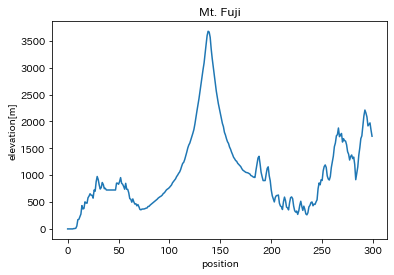

In [3]:
# 問題1
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.title("Mt. Fuji")
plt.plot(fuji[:,0], fuji[:,3])
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.show()

In [4]:
# 問題2
y = fuji[:,3]
x = fuji[:,0]
def compute_gradient(position):
    return (y[position] - y[position-1]) / (x[position] - x[position-1])

print(compute_gradient(7))

0.5899999999999999


In [6]:
# 問題3
alpha = 0.2
def compute_next_position(position, alpha = 0.2):
    next_position = np.round( position - (alpha * compute_gradient(position)))
    if 0 < next_position <  len(fuji): 
        return int(next_position)
    
    print("{}は存在しない地点です".format(next_position))

In [7]:
# 問題3 サンプル実行
position = 299
print("{}の次の移動先は{}です".format(position, compute_next_position(position)))

322.0は存在しない地点です
299の次の移動先はNoneです


In [8]:
# 問題4 
def downhill_fuji(first_position, alpha = 0.2):
    routes = [first_position]
    current_position = first_position
    while True:
        next_position = compute_next_position(current_position, alpha=alpha)
        # もしnext_positionが見つからなかったり、同じポジションのままだったり、すでに通った経路を通ったことがある場合
        if next_position is None:
            print("次の位置が見つからなかったため、下山を終了します")
            break
        elif next_position == current_position:
            print("前回と同じ位置だったため下山を終了します 今の位置: {}, 次の位置: {}".format(current_position, next_position))
            break
        elif next_position in routes:
            print("既に通ったことのある位置だったため下山を終了します, 次の位置: {}".format(next_position))
            break
        else:
            routes.append(next_position)
            current_position = routes[-1]
    print("{}からスタートした場合の下山のルート: {}".format(first_position, routes))
    return routes

In [9]:
# 問題4 サンプル実行
start_position = 136
routes = downhill_fuji(start_position)

前回と同じ位置だったため下山を終了します 今の位置: 75, 次の位置: 75
136からスタートした場合の下山のルート: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


前回と同じ位置だったため下山を終了します 今の位置: 75, 次の位置: 75
136からスタートした場合の下山のルート: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


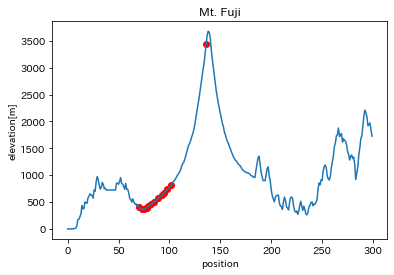

In [11]:
# 問題5
def display_downhill_graph(routes):
    plt.title("Mt. Fuji")
    plt.plot(fuji[:,0], fuji[:,3])
    plt.scatter(routes, fuji[routes, 3], c='r')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.show()
display_downhill_graph(downhill_fuji(136))

既に通ったことのある位置だったため下山を終了します, 次の位置: 177
142からスタートした場合の下山のルート: [142, 177, 178, 180, 186, 164, 169, 173, 176]


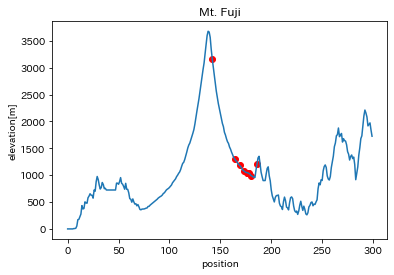

In [12]:
# 問題6,7 スタートが142の場合
display_downhill_graph(downhill_fuji(142))

前回と同じ位置だったため下山を終了します 今の位置: 80, 次の位置: 80
50からスタートした場合の下山のルート: [50, 54, 58, 80]


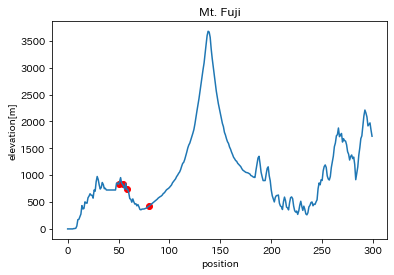

In [13]:
# 問題6,7 スタートが50の場合
display_downhill_graph(downhill_fuji(50))

既に通ったことのある位置だったため下山を終了します, 次の位置: 239
200からスタートした場合の下山のルート: [200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226]


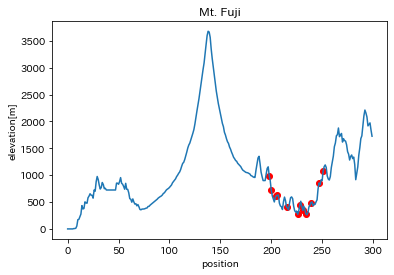

In [14]:
# 問題6,7 スタートが200の場合
display_downhill_graph(downhill_fuji(200))

既に通ったことのある位置だったため下山を終了します, 次の位置: 247
290からスタートした場合の下山のルート: [290, 253, 247, 226, 239, 228, 206, 205, 198, 231]


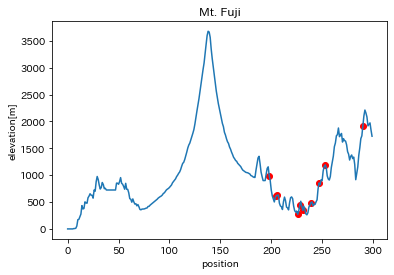

In [15]:
# 問題6,7 スタートが290の場合
display_downhill_graph(downhill_fuji(290))

-32.0は存在しない地点です
次の位置が見つからなかったため、下山を終了します
136からスタートした場合の下山のルート: [136]


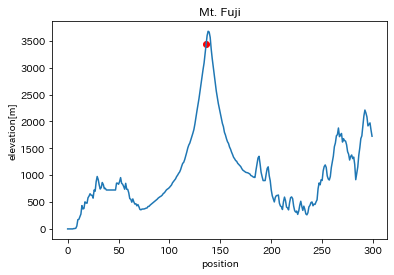

In [16]:
# 問題8 alpha 1.0の場合
display_downhill_graph(downhill_fuji(136, alpha=1. ))

前回と同じ位置だったため下山を終了します 今の位置: 80, 次の位置: 80
136からスタートした場合の下山のルート: [136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


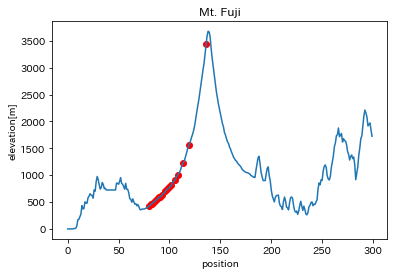

In [17]:
# 問題8 alpha 0.1の場合
display_downhill_graph(downhill_fuji(136, alpha=0.1 ))

前回と同じ位置だったため下山を終了します 今の位置: 120, 次の位置: 120
136からスタートした場合の下山のルート: [136, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120]


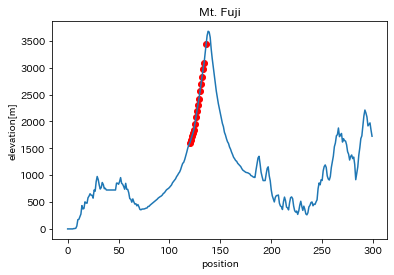

In [18]:
# 問題8 alpha 0.01の場合
display_downhill_graph(downhill_fuji(136, alpha=0.01 ))

前回と同じ位置だったため下山を終了します 今の位置: 80, 次の位置: 80
136からスタートした場合の下山のルート: [136, 128, 122, 119, 116, 113, 110, 109, 107, 105, 104, 103, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]


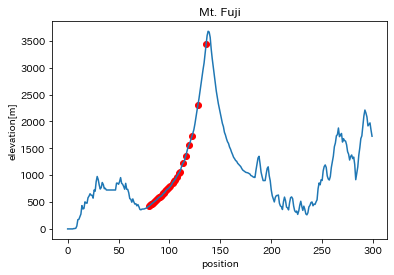

In [19]:
# 問題8 alpha 0.05の場合
display_downhill_graph(downhill_fuji(136, alpha=0.05 ))